In [1]:
import tributary as t

In [2]:
def myfoo(ds):
    for d in ds:
        vals = d.values()
        d['HIGH'] = max(vals)
        d['LOW'] = min(vals)
        d['MID'] = sum(vals)/len(vals)
    avgs = [x['MID'] for x in ds]
    ds[-1]['SMA'] = sum(avgs)/len(avgs)
    return ds[-1]

In [3]:
vals = t.Random(100)
w = t.Window(vals, size=5)
n = t.Apply(myfoo, w)
psp1 = t.Perspective(n, columns=['HIGH', 'LOW', 'MID', 'SMA'], view='y_line')
psp2 = t.Perspective(psp1)

PerspectiveWidget(columns=['HIGH', 'LOW', 'MID', 'SMA'], view='y_line')

PerspectiveWidget()

In [4]:
t.run(psp2);

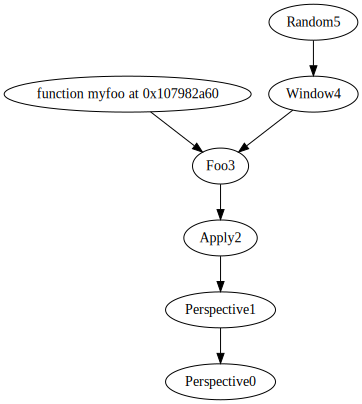

In [5]:
t.GraphViz(psp2, 'psp')

In [6]:
http = t.HTTP('https://unpkg.com/@jpmorganchase/perspective-examples@0.1.18/build/citibike.json', json=True, field='stationBeanList')
psp = t.Perspective(http, view='xy_scatter', columns=['longitude', 'latitude', 'availableBikes'])

PerspectiveWidget(columns=['longitude', 'latitude', 'availableBikes'], view='xy_scatter')

In [7]:
t.run(psp);

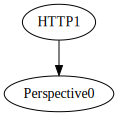

In [8]:
t.GraphViz(psp, 'psp')

In [9]:
url = 'https://coincap.io'
channel = 'trades'

In [10]:
sio = t.SocketIO(url, field='msg', channel=channel)
psp = t.Perspective(sio)

PerspectiveWidget()

In [11]:
t.run(psp);

Terminating...


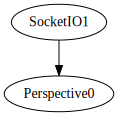

In [12]:
t.GraphViz(psp)